In [73]:
using HorizonSideRobots
using PyPlot; pygui(true)
h = 10
w = 10
r = Robot(h, w)
show!(r)

┌ Warning: Окно с предыдущей обстановкой при открытии нового было автоматически закрыто
└ @ HorizonSideRobots C:\Users\AlexandrovaNV\.julia\packages\HorizonSideRobots\UumzG\src\HorizonSideRobots.jl:187


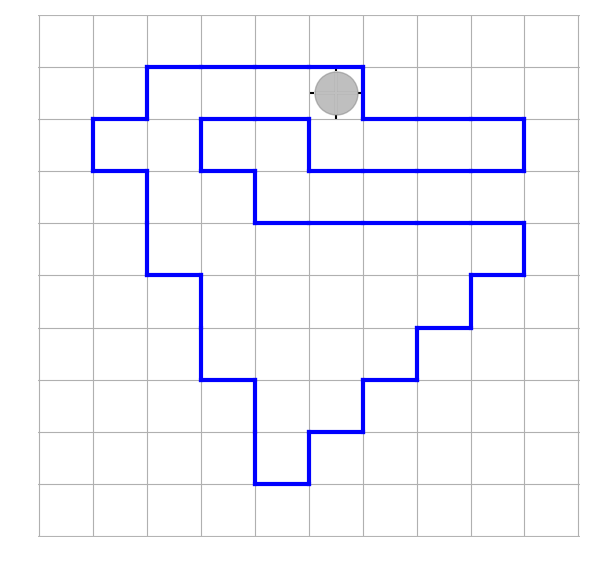

In [74]:
show(r)

In [75]:
count = 0
visited = Set()
borders = Set()
x, y = 0, 0

function side_to_diff(side)
    if Int(side) == 0
        return 0, 1
    elseif Int(side) == 1
        return -1, 0
    elseif Int(side) == 2
        return 0, -1
    elseif Int(side) == 3
        return 1, 0
    end
end

function next_side(side)
    return HorizonSide((Int(side) + 1) % 4)
end
function prev_side(side)
    return HorizonSide((Int(side) + 3) % 4)
end

function check(r)
    global count
    if ismarker(r)
        count += 1
        if count == 2
            return true
        end
    end
    return false
end

function fill_borders(r)
    global x, y, borders
    for side in [Nord, West, Sud, Ost]
        if isborder(r, side)
            dx, dy = side_to_diff(side)
            push!(borders, Pair(x + dx, y + dy))
        end
    end
end

function moves(r, move_side, check_side)
    global x, y, visited, borders
    
    while !isborder(r, move_side) && isborder(r, check_side)
        move!(r, move_side)
        dx, dy = side_to_diff(move_side)
        x += dx
        y += dy
        fill_borders(r)
        push!(visited, Pair(x, y))
        if check(r)
            return
        end
    end
    
    if !isborder(r, check_side)
        move!(r, check_side)
        dx, dy = side_to_diff(check_side)
        x += dx
        y += dy
        fill_borders(r)
        push!(visited, Pair(x, y))
        if check(r)
            return
        end
        moves(r, next_side(move_side), next_side(check_side))
    elseif isborder(r, move_side)
        moves(r, prev_side(move_side), prev_side(check_side))
    end
end

function solve(r)
    global visited, borders, x, y
    
    push!(visited, Pair(x, y))
    check_side, move_side = Nord, Nord
    for side in [Nord, West, Sud, Ost]
        if isborder(r, side)
            check_side = side
            move_side = prev_side(side)
            break
        end
    end
    putmarker!(r)
    moves(r, move_side, check_side)
    
    setdiff!(borders, visited)
    
    a = length(borders)
    b = length(visited)
    if b > a
        println("Снаружи лабиринта")
    else
        println("Внутри лабиринта")
    end
end

solve(r)

Внутри лабиринта
